In [40]:
import numpy as np
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Load Sample Data And Explore

In [11]:
dataset = sm.datasets.spector.load_pandas()
dataset.exog.describe()

,GPA,TUCE,PSI
count,32.000000,32.000000,32.000000
mean,3.117188,21.937500,0.437500
std,0.466713,3.901509,0.504016
min,2.060000,12.000000,0.000000
25%,2.812500,19.750000,0.000000
50%,3.065000,22.500000,0.000000
75%,3.515000,25.000000,1.000000
max,4.000000,29.000000,1.000000


In [14]:
dataset.endog.value_counts()

0.0    21
1.0    11
Name: GRADE, dtype: int64

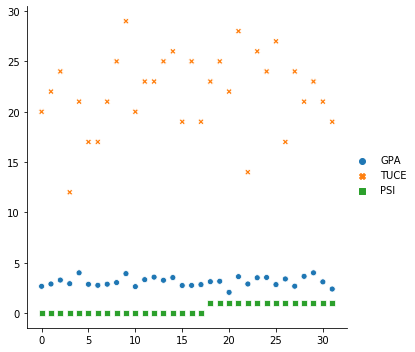

In [18]:
sns.relplot(data=dataset.exog)

In [26]:
total = pd.concat([dataset.exog, dataset.endog], axis=1)
total.head()

,GPA,TUCE,PSI,GRADE
0,2.66,20.0,0.0,0.0
1,2.89,22.0,0.0,0.0
2,3.28,24.0,0.0,0.0
3,2.92,12.0,0.0,0.0
4,4.00,21.0,0.0,1.0


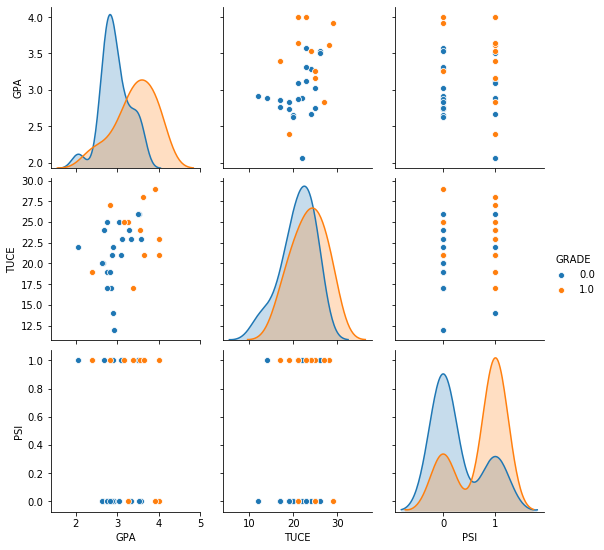

In [27]:
sns.pairplot(data=total, hue='GRADE')

## Logistic Regression With Statsmodels

In [28]:
exogeneous = sm.add_constant(dataset.exog)
endogeneous = dataset.endog

c:\users\benja\appdata\local\programs\python\python38\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [32]:
model = sm.Logit(endogeneous, exogeneous)
fit = model.fit()
fit.summary()

Optimization terminated successfully.
         Current function value: 0.402801
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  GRADE   No. Observations:                   32
Model:                          Logit   Df Residuals:                       28
Method:                           MLE   Df Model:                            3
Date:                Sun, 17 Jan 2021   Pseudo R-squ.:                  0.3740
Time:                        17:46:02   Log-Likelihood:                -12.890
converged:                       True   LL-Null:                       -20.592
Covariance Type:            nonrobust   LLR p-value:                  0.001502
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.0213      4.931     -2.641      0.008     -22.687      -3.356
GPA            2.8261      1.263      2.238      0.025       0.351       5.301
TUCE           0.0952      0.142      0.672      0.501      -0.182       0.373
PSI            2.3787      1.065      2.234      0.025       0.292       4.465
==============================================================================
"""

## Now With Sklearn

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(dataset.exog, dataset.endog, test_size=0.2)

In [47]:
model_sk = LogisticRegression()
fitted_sk = model_sk.fit(X_train, Y_train)
f"coeffs {fitted_sk.coef_}, intercept {fitted_sk.intercept_}"

'coeffs [[0.95421131 0.00638586 1.15787777]], intercept [-4.44048983]'

In [50]:
Y_pred = fitted_sk.predict(X_test)
f"R2 {r2_score(Y_test, Y_pred)}, MSE {mean_squared_error(Y_test, Y_pred)}"

'R2 -0.16666666666666696, MSE 0.2857142857142857'

N.B.: R2 is NOT a good score for logistic, statsmodels use 'Pseudo R-Squared'